# Занятие 3

## Функции

### Как их задавать и как ими пользоваться?

Общая структура функции, независимо от ее сложности будет такой

*   Функция начинается с зарезервированного слова def (строка 1)
*   затем следует ее название (строка 1)
*   далее список параметров (строка 1)
*   далее тело функции (рабочая часть) (строка 2)
*   возврат значения (значений) из функции (строка 3)

In [ ]:
def two_numbers_summary(a,b):
   print(a)
   print(b)
   summary = a + b
   return summary


value = two_numbers_summary(10, 5)
print(value)

10
5
15


Можно явно передать значение каждого параметра, хоть в другом порядке

In [ ]:
# teacher

5
10


15

Но значения по ключу не должны идти впереди позиционных параметров

In [ ]:
# teacher

SyntaxError: ignored

Позиционные параметры "не сдвигаются". То-есть их разрешение идет по порядку, нельзя указать первым параметров значение для b, если в декларации функции он идет вторым. В данном случае мы получим ошибку -- два варианта для параметра "a"

In [ ]:
# teacher

TypeError: ignored

А вот так можно, хотя и избыточно

In [ ]:
# teacher

3
10


13

#### Задание 1
Напишите функцию, считающую количество денег на вкладе через n лет, с учетом процентной ставки p (от 0 до 1), и начального капитала cap.

In [1]:
# ваш код тут

1610.5100000000002

Мы можем вернуть из функции несколько значений. Хотя на самом деле возвращается просто кортеж с несколькими значениями

In [ ]:
# teacher

(1100.0, 1000, 100.0)
1100.0 1000 100.0


Бывает удобно использовать значения по умолчанию. Например, вы не хотите зашивать в функцию подсчета прибыли какой-то конкретный процент, хотя понимаете, что вот сейчас вы чаще всего будете считать с определенной ставкой.

In [ ]:
def convert_calculate_price(base, course=60, interest_rate=0.1):
   base *= course
   interest = base * interest_rate
   return base + interest, base, interest

 d
full_price, raw, interest = convert_calculate_price(1000)
print("Только кол-во денег на входе")
print(full_price, raw, interest)
full_price, raw, interest = convert_calculate_price(1000, 59)
print("Только кол-во денег и курс на входе")
print(full_price, raw, interest)
full_price, raw, interest = convert_calculate_price(1000, 59, 0.15)
print("Кол-во денег, курс на входе, а также наценка")
print(full_price, raw, interest)
full_price, raw, interest = convert_calculate_price(1000, interest_rate=0.15)
print("Кол-во денег и наценка, курс используется по умолчанию")
print(full_price, raw, interest)

Только кол-во денег на входе
66000.0 60000 6000.0
Только кол-во денег и курс на входе
64900.0 59000 5900.0
Кол-во денег, курс на входе, а также наценка
67850.0 59000 8850.0
Кол-во денег и наценка, курс используется по умолчанию
69000.0 60000 9000.0


In [ ]:
convert_calculate_price(1000, interest_rate=0.15)

(69000.0, 60000, 9000.0)

In [ ]:
# а вот так нельзя
def convert_calculate_price(course=60, interest_rate=0.1, base):
   base *= course
   interest = base * interest_rate
   return base + interest, base, interest

SyntaxError: ignored

#### Задание 2
Сделайте функцию, делающую пузырьковую сортировку. Но добавьте в функцию параметр, который будет регулировать, будет это сортировка по возрастанию или по убыванию.

In [ ]:
# ваш код тут

[1, 2, 3]
[7, 6, 3, 2, 1]


### Области видимости

In [ ]:
# пример 1
# какие переменные тут локальные, а какие глобальные?
def sample_function(var_y):
   var_x = var_y**2
   print(var_y)
   return var_x


var_c = 10
sample_function(20)

20


400

А что если мы попробуем изменить var_c внутри sample_function?

In [ ]:
# teacher

До вызова функции var_c: 10
Внутри функции var_c: 3
После вызова функции var_c: 10


In [ ]:
# пример 2

def sample_function(var_a, var_b):
   print("В функции")
   print(f"var_a: {var_a}")
   print(f"var_b: {var_b}")
   print(f"var_c: {var_c}")
   var_d = 888

var_a = 3
var_c = 1
print("Снаружи функции")
print(f"var_a: {var_a}")
print(f"var_c: {var_c}")
sample_function(33, 100)
print(f"var_d: {var_d}")

Снаружи функции
var_a: 3
var_c: 1
В функции
var_a: 33
var_b: 100
var_c: 1


NameError: ignored

Получается, что доступ к глобальным переменным в локальной области видимости у нас есть, но менять их просто так нельзя, поскольку будет создана локальная переменная с таким же именем, но не в глобальной области видимости, а в локальной.

#### Поведение изменяемых и неизменяемых типов при передаче в функции

In [ ]:
# пример 3.

# неизм

# glob.var = 1e6

# glob.var      var_a
# 1e6           1e6


# изм
# glob.var = {"a": 1}

# glob.var      var_a
#        {"a": 1} 



def sample_function(var_a, var_b):
   print("В функции")
   print(f"var_a: {var_a}")
   var_a = var_a.copy()
   var_a["z"] = 777
   print(f"var_b: {var_b}")
   var_b = (3, 3, 3)
   print(f"var_b: {var_b}")


var_a = {"x": 1, "y": 2}
var_b = (1,2,3)
print("Снаружи функции")
print(f"var_a: {var_a}")
print(f"var_b: {var_b}")
sample_function(var_a, var_b)
print("После функции")
print(f"var_a {var_a}")
print(f"var_b {var_b}")

Снаружи функции
var_a: {'x': 1, 'y': 2}
var_b: (1, 2, 3)
В функции
var_a: {'x': 1, 'y': 2}
var_b: (1, 2, 3)
var_b: (3, 3, 3)
После функции
var_a {'x': 1, 'y': 2}
var_b (1, 2, 3)


Запомните, что в случае неизменяемых типов данных, в функцию передается копия, а в случае изменяемых тот же объект, на который мы ссылаемся в текущей области видимости (в которой мы вызываем функцию)

Также, стоит помнить о том, что значения по умолчанию вычисляются не в момент запуска функции, а в момент ее объявления.

In [ ]:
# То-есть
# Пусть мы хотим сделать несколько словарей в которых у нас будут люди не более определенного возраста
def keep_ab(a, b, limit, d={}):
  if b > limit:
    print("How dare you!")
  else:
    d[a] = b

  return d


# Откуда-то мы уже надергали людей
first_dict = {"Vladimir": 20, "Anna": 21}
# добавляем туда новых кандидатов, если они проходят проверку
keep_ab("Vasilii", 35, 30, first_dict)
keep_ab("Petr", 27, 30, first_dict)
print(first_dict)
# кажется здесь все нормально


# допустим мы формируем новый словарь, там ограничение будет 25, 
# подготовленного заранее набора данных у нас нет, так что воспользуемся значением по умолчанию
second_dict = keep_ab("Andrew", 24, 25)
keep_ab("Mark", 22, 25, second_dict)
print(second_dict)
# тоже выглядит все в порядке


# теперь сформируем еще один словарь, тем же способом, но с ограничением по возрасту 15
third_dict = keep_ab("Michael", 13, 15)
keep_ab("Anastasia", 10, 15, third_dict)
print(third_dict)
# откуда взялись Andrew и Mark?

How dare you!
{'Vladimir': 20, 'Anna': 21, 'Petr': 27}
{'Andrew': 24, 'Mark': 22}
{'Andrew': 24, 'Mark': 22, 'Michael': 13, 'Anastasia': 10}


Поэтому не стоит указывать в качестве параметров по умолчанию изменяемые типы. Это может привести к ошибкам. Обычно, IDE (например, pycharm) подчеркивает подобные "ошибки".

#### Задание 3
Помня правило LEGB. Что напишет на экран данный код?

In [ ]:
list = [10, 11]

def my_function_1(val):
  int = val
  print(int**2)
  print(list)
  val = 7

def my_function_2(val):
  list.append(val)


print(int("123"))
my_function_1(10)
my_function_2(8)
print(list)

# попробуйте прикинуть, не запуская код, что будет выведено на экран?

123
100
[10, 11]
[10, 11, 8]


### Базовое тестирование и оформление функций

### Задание 4
Напишите функцию для вычисления следующей кусочно непрерывной функции. 
1. От минус бесконечности до 0 она возвращает y=x
2. От 0 до 4 вовзвращает y=x**2
3. От 4 до плюс бесконечности возвращает y=16

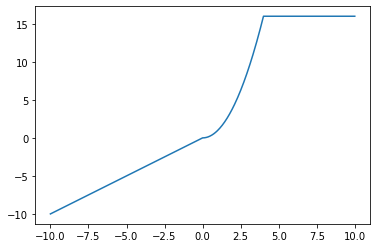

In [ ]:
# ваш код тут

Теперь, когда мы написали эту функцию. Давайте напишем тесты, проверяющие ее работу. Какие здесь "точки перегиба"?

In [ ]:
# teacher

### Задание 5
Напишите функцию, производяющую операцию inner join по ключу.

inner join -- операция над множествами (в нашем случае двумя), результатом операции является множество всевозможных пар элементов из множеств a и b у которых совпадают ключи.

Например:


```
a = (("key 1", 1), ("key 2", 2), ("key 3", 3))
b = (("key 1", 6), ("key 1", 7), ("key 2", 10))

a inner join b

--> (("key 1", (1,6)), ("key 1", (1, 7)), ("key 2", (2, 10)))

```

На вход подаются два кортежа с кортежами вида ключ - значение внутри в том же формате, что и в примере. Нужно вернуть результат операции inner join в том же формате, что и в примере. Результат следует отсортировать в порядке возрастания по ключам.



In [ ]:
# ваш код тут
def ijoin(a,b):
  """
  inner join двух множеств в формате
  a = (("key 1", 1), ("key 2", 2), ("key 3", 3))
  b = (("key 1", 6), ("key 1", 7), ("key 2", 10))

  a inner join b

  --> (("key 1", (1,6)), ("key 1", (1, 7)), ("key 2", (2, 10)))
  """
  # TODO: быть может нам проверить формат входных данных?


  res = []
  # TODO: Просто воспользуйтесь вложенными циклами
  

  # сортировка по первому элементу кортежа
  res.sort(key=lambda pair: pair[0])

  return tuple(res) # возврат результата

In [ ]:
a = (("key 1", 1), ("key 2", 2), ("key 3", 3))
b = (("key 1", 6), ("key 1", 7), ("key 2", 10))
assert ijoin(a,b) == (('key 1', (1, 6)), ('key 1', (1, 7)), ('key 2', (2, 10))), "Тест не пройден"

#### Задание 5.1
Какие еще тесты следует сюда добавить, исходя из формулировки задания?

In [ ]:
ijoin(b,a)

(('key 1', (6, 1)), ('key 1', (7, 1)), ('key 2', (10, 2)))

In [ ]:
# ваш код тут

### Задание 6
Напишем xor шифратор и дешифратор строчек по ключу.

Немного теории:
1. xor -- это взаимоисключающее или или сумма по модулю 2
2. Пусть даны два числа 10 и 3. В двоичной записи их можно записать так 10=1010 и 3 = 11.
3. Чтобы вычислить сумму по модулю два нужно записать одно число под другим, добавив ведущих нулей если нужно:

```
1010
0011
```
4. Далее необходимо взять посимвольную сумму по модулю 2.

```
1010
0011
-->
1021

% 2
-->
1001
```
5. Получается, что результат 1001=1*8 + 0 * 4 + 0 * 2 + 1 * 1 = 9
6. Теперь обратим внимание на замечательное свойство.

```
1001
0011
-->
1012

%2
-->
1010
```
7. То-есть применив xor снова на числе 3, мы получили с вами то же число, что и раньше! Можно сказать, что мы зашифровали 10 с ключом 3, а затем расшифровали шифр обратно.


Каждый символ в компьютере на самом деле находится в некоторой таблице, в которой написано, что определенному числу соответствует такой-то символ. Узнать номер любого символа можно с помощью функции ord(). А сделать обратное преобразование номера к символу, можно с помощью функции chr().


Мы напишем несколько функций, которые позволят нам шифровать одну строчку с помощью другой строчки (пароля или ключа). Мы можем так сделать, потому что строка состоит из символов, а значит для каждого символа мы можем найти номер. Если строчки одинакового размера, мы можем каждый символ шифруемой строки провести через xor соответствующего символа ключа. Если мы сделаем с полученным шифром ту же процедуру, то мы получим нашу строчку обратно. Если же строка не совпадает с ключом по длине, мы можем скопировать ключ n раз до того момента пока длина ключа не станет равна длине строки.





In [ ]:
ord("a")

97

In [ ]:
ord("b")

98

In [ ]:
ord("ы")

1099

In [ ]:
chr(1099)

'ы'

In [ ]:
# ваш код тут
def cut(reference, tocut):
  """
  выравнивание строки tocut по reference по длине
  прим.
  "abcd", "abc" -> "abca"
  "abcd", "abcdef" -> "abcd"
  "abcd", "ab" -> "abab"

  reference: str
  tocut: str
  return: str
  """
  pass

def cipher(s, password):
  """
  Проводит посимвольно операцию xor между s и password.
  - Если password меньше длины s, то он копируется до тех пор пока не станет равным 
  по длинеs
  - Если password больше длины s, то он обрезается до длины s
  s: str
  password: str
  return: str
  """
  pass
  

#### Задание 6.1
Для функции cut напишите простые тесты самостоятельно

In [ ]:
# ваш код тут

In [ ]:
cipher("Hello world", "pass123")

'8\x04\x1f\x1f^\x12D\x1f\x13\x1f\x17'

In [ ]:
# тесты на функцию cipher
assert cipher("Big brown fox jumped over a lazy dog", "very secret password") == "4\x0c\x15YB\x01\n\x14\x1cE\x12O\x08A\x19\x06\x1a\x1f\x17\x00V\n\x04\x1cRS\x04C\x1e\x04\x0eYP\x05\x1c\x14", "Тест не пройден"
assert cipher("4\x0c\x15YB\x01\n\x14\x1cE\x12O\x08A\x19\x06\x1a\x1f\x17\x00V\n\x04\x1cRS\x04C\x1e\x04\x0eYP\x05\x1c\x14", "very secret password") == "Big brown fox jumped over a lazy dog", "Тест не пройден"
assert cipher("Hello", "abc") == ")\x07\x0f\r\r", "Тест не пройден"
assert cipher(")\x07\x0f\r\r", "abc") == "Hello", "Тест не пройден"
assert cipher("Hello", "abcdefg123") == ")\x07\x0f\x08\n", "Тест не пройден"
assert cipher(")\x07\x0f\x08\n", "abcdefg123") == "Hello", "Тест не пройден"